In [3]:
import numpy as np

print(np.sqrt(4))

2.0


In [4]:
A = np.array([1, 2, 3, 45.43435, 32324.54353])
print(A)
print(type(A))

[1.00000000e+00 2.00000000e+00 3.00000000e+00 4.54343500e+01
 3.23245435e+04]
<class 'numpy.ndarray'>


In [18]:
A = np.arange(0, 5, 0.5, dtype = float)
print(A)
print(type(A))

A = np.linspace(0, 10, 5, endpoint = False)
print(A)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
<class 'numpy.ndarray'>
[0. 2. 4. 6. 8.]


In [29]:
A = np.zeros(10) + 5
print(A)

A = np.ones(10) * 5
print(A)

B = np.empty(10)
B[:] = np.nan
print(B)

print(A[1:3])

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[nan nan nan nan nan nan nan nan nan nan]
[5. 5.]


In [41]:
A = np.array([[1, 2, 3],[4, 5, 6],[np.nan,34.454,34]])
print(A)

nrow, ncol = A.shape
print(nrow,ncol)

print(np.nanmean(A))
print(np.nansum(A))
print(np.nanmax(A))
print(np.nanmedian(A))

[[ 1.     2.     3.   ]
 [ 4.     5.     6.   ]
 [   nan 34.454 34.   ]]
3 3
11.181750000000001
89.45400000000001
34.454
4.5


In [44]:
np.nanmean(A[:,1])

print(A/2)

[[ 0.5    1.     1.5  ]
 [ 2.     2.5    3.   ]
 [   nan 17.227 17.   ]]


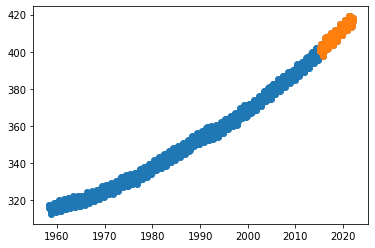

In [47]:
fname = "MaunaLoaCO2_monthly.txt"

A = np.loadtxt(fname)

import matplotlib.pyplot as plt
plt.plot(A[:,2],A[:,3],'o')



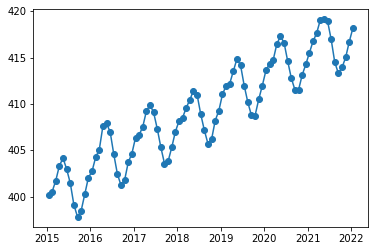

In [49]:
B = A[A[:,2]>2015,:]
plt.plot(B[:,2],B[:,3],'-o')

(720, 1440)


<AxesSubplot:>

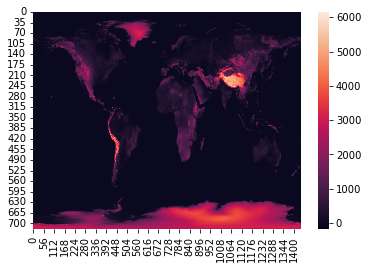

In [53]:
import numpy as np

fname = "globalelev.txt"
elev = np.loadtxt(fname)
print(elev.shape)

import seaborn as sns
sns.heatmap(elev)

(720, 1440) (36, 72)


<AxesSubplot:>

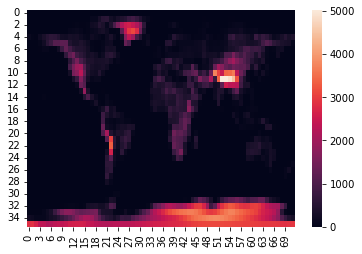

In [59]:
M = 20
N = 20
nrow, ncol = elev.shape
newelev = np.empty([int(nrow/M), int(ncol/N)])
print(elev.shape, newelev.shape)

for i in range(0, nrow, M):
    for j in range(0, ncol, N):
        r1 = i
        r2 = i+M
        c1 = j
        c2 = j+N
        arr = elev[r1:r2,c1:c2]
        newelev[int(i/M),int(j/N)] = np.mean(arr)

import seaborn as sns
sns.heatmap(newelev)

In [6]:
import pandas as pd
import numpy as np

fname = "MaunaLoaCO2_monthly_sitename.csv"
DF = pd.read_csv(fname) #Changed the csv into a dataframe

FDF = DF[(DF["numofdays"] > 0) & (DF['Year'] != 1958) & (DF['Year'] != 2022) & (DF['stdofdays'] > 0)]
FDF #Excluded data from 1958, 2022, and any negative values in the 'numofdays' and 'stdofdays'

AA=[] 
years = []
DAA = []
STDM = []
dict_data = {}

"""
I intialized a list for the years, annual averages, deseasonalized annual average, and std of months.
I then filtered through the dataframe using a loop and added the data to their respective lists.
Each list was then added to the same dict with the correct header that will represent that data in the new dataframe.
"""

for i in range(len(set(FDF['Year']))):
    month_avg =FDF[['Monthly_average']][(FDF['Year']==1974+i)]
    deseasonalied_avg = FDF[['deseasonalized']][(FDF['Year']==1974+i)]
    STD_months = FDF[['Monthly_average']][(FDF['Year']==1974+i)]
    year = set(FDF['Year'])
    year = list(year)
    AA.append(np.nanmean(month_avg))
    years.append(year[i])
    DAA.append(np.nanmean(deseasonalied_avg))
    STDM.append(np.nanstd(STD_months))
    dict_data['Year'] = years
    dict_data['annual_average'] = AA
    dict_data['deseasonalized_annual_average'] = DAA
    dict_data['std_of_months'] = STDM

df = pd.DataFrame.from_dict(dict_data)
df

,Year,annual_average,deseasonalized_annual_average,std_of_months
0,1974,329.763750,330.346250,2.061455
1,1975,331.160909,331.072727,1.853294
2,1976,332.026667,332.028333,1.996820
3,1977,333.843333,333.841667,1.849637
4,1978,335.415000,335.413333,1.910081
5,1979,336.835833,336.835833,1.759405
6,1980,338.762500,338.765000,1.791606
7,1981,340.119167,340.120000,2.016331
8,1982,341.479167,341.476667,2.059796
9,1983,343.152500,343.152500,1.853668
